In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
from keras.preprocessing.sequence import pad_sequences
np.random.seed(0)

In [3]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
# character mappings
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

In [16]:
# printing 5 values in char_to_int dictionary
for key,val in  char_to_int.items():
  print(key , val)
  if val >5:
    break


A 0
B 1
C 2
D 3
E 4
F 5
G 6


In [17]:
# printing 5 values in int_to_char dictionary
for key,val in  int_to_char.items():
  print(key , val)
  if key >5:
    break

0 A
1 B
2 C
3 D
4 E
5 F
6 G


In [28]:
# prepare the dataset of input to output pairs encoded as integers
num_inputs = 1000
max_len = 5
dataX = []
dataY = []
seq=[]
for i in range(num_inputs):
    start = np.random.randint(len(alphabet)-2)
    end = np.random.randint(start, min(start+max_len,len(alphabet)-1))
    sequence_in = alphabet[start:end+1]
    sequence_out = alphabet[end + 1]
    dataX.append([char_to_int[char] for char in sequence_in])
    dataY.append(char_to_int[sequence_out])
    seq.append(sequence_in + '->'+ sequence_out)
seq[:10]

['LMN->O',
 'WXY->Z',
 'IJKL->M',
 'ABCDE->F',
 'VWXY->Z',
 'OP->Q',
 'DEF->G',
 'W->X',
 'W->X',
 'UVWXY->Z']

In [29]:
# convert list of lists to array and pad sequences if needed
X = pad_sequences(dataX, maxlen=max_len, dtype='float32')
# reshape X to be [samples, time steps, features]
X = numpy.reshape(X, (X.shape[0], max_len, 1))


In [31]:
X.shape

(1000, 5, 1)

In [32]:
# normalize
X = X / float(len(alphabet))
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

In [33]:
y.shape

(1000, 26)

In [40]:
# Model creation
batch_size = 16
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], 1)))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X, y, epochs=150, batch_size=batch_size, verbose=1)

Epoch 1/150
63/63 [==============================] - 2s 5ms/step - loss: 3.2439 - accuracy: 0.0450
Epoch 2/150
63/63 [==============================] - 0s 5ms/step - loss: 3.1727 - accuracy: 0.0410
Epoch 3/150
63/63 [==============================] - 0s 5ms/step - loss: 3.0524 - accuracy: 0.0930
Epoch 4/150
63/63 [==============================] - 0s 5ms/step - loss: 2.9556 - accuracy: 0.1030
Epoch 5/150
63/63 [==============================] - 0s 5ms/step - loss: 2.8869 - accuracy: 0.1050
Epoch 6/150
63/63 [==============================] - 0s 5ms/step - loss: 2.8252 - accuracy: 0.1370
Epoch 7/150
63/63 [==============================] - 0s 5ms/step - loss: 2.7503 - accuracy: 0.1510
Epoch 8/150
63/63 [==============================] - 0s 5ms/step - loss: 2.6655 - accuracy: 0.1680
Epoch 9/150
63/63 [==============================] - 0s 5ms/step - loss: 2.5689 - accuracy: 0.1830
Epoch 10/150
63/63 [==============================] - 0s 5ms/step - loss: 2.4789 - accuracy: 0.1860
Epoch 11/

In [39]:
model.history.history.keys()

dict_keys(['loss', 'accuracy'])

dict_keys(['loss', 'accuracy'])


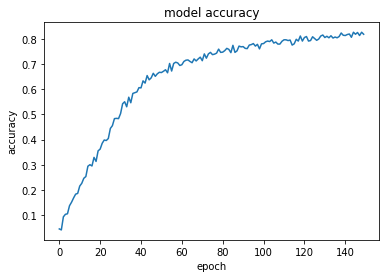

In [45]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# accuracy plot
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

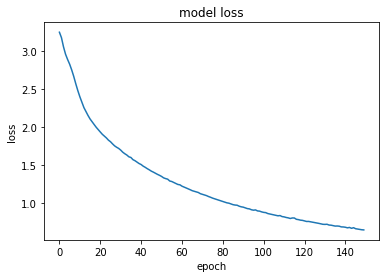

In [44]:
# Loss plot
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [49]:
# demonstrate predictions
for i in range(5):
    pattern_index = numpy.random.randint(len(dataX))
    pattern = dataX[pattern_index]
    x = pad_sequences([pattern], maxlen=max_len, dtype='float32')
    x = numpy.reshape(x, (1, max_len, 1))
    x = x / float(len(alphabet))
    prediction = model.predict(x, verbose=0)
    index = numpy.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    print(seq_in, "->", result)

['V'] -> X
['O', 'P'] -> Q
['F', 'G'] -> H
['E'] -> D
['T', 'U', 'V'] -> W


### Conclusion
Model accuracy can be increase by increasing the epochs